# A Trip Through The Evolution Of Modern Music

Analyzing the changes in modern music from the 1950s to the 2000s

<a id="0"></a>
### Content
* [1. Introduction](#1)

    * [1.1 Introduction](#1.1)
    * [1.2 Aims and objectives](#1.2)
    * [1.3 Methodology](#1.3)
        * [1.3.1 Data Sources](#1.3.1)
        * [1.3.2 Explaining Spotify Data](#1.3.2) 
        * [1.3.3 Explaining LastFM Data](#1.3.3)
    * [1.4 Limitations and Annotations](#1.4)

* [2. The APIs](#2)

    * [2.1 Defining data extracting function for the Spotify API](#2.1)
        * [2.1.1 Connect and Extract Playlist IDs](#2.1.1)
        * [2.1.2 Get Track IDs](#2.1.2)
        * [2.1.3 Extract Track Information and Create a DataFrame](#2.1.3)
        * [2.1.4 Spotify Data Cleaning](#2.1.4)
        
    * [2.2 Defining data extracting function for the LastFM API](#2.2)
        * [2.2.1 Extract Tag Information](#2.2.1)
        * [2.2.2 Check Retrieved Data](#2.2.2)
        * [2.2.3 Get Track Genre](#2.2.3)
        * [2.2.4 Check Genre Data](#2.2.4)
        * [2.2.5 LastFM Data Cleaning](#2.2.5)
        * [2.2.6 Check Final Data and Add to DataFrame](#2.2.6)

* [3. Exploratory Data Analysis](#3)

    * [3.1 Basic Data Set Exploration](#3.1)
        * [3.1.1 Dimensions of the DataFrame](#3.1.1)
        * [3.1.2 Data Information Various Columns](#3.1.2)
        * [3.1.3 Numerical Feature Statistics](#3.1.3)
        * [3.1.4 Other Feature Statistics](#3.1.4)
  
    * [3.2 Plotting and Visualizations](#3.2)
        * [3.2.1 Numerical Feature Distribution](#3.2.1)
        * [3.2.2 Feature Correlation](#3.2.2)
        * [3.2.3 Top 5 Genre Distribution Through the Decades](#3.2.3)
        * [3.2.4 Audio Features Trend](#3.2.4)
        
    * [3.3 Natural Language Processing](#3.3)
        * [3.3.1 Title Statistics](#3.3.1)
        * [3.3.2 Most Common Words](#3.3.2)
        * [3.3.3 Most Common Words By Decade](#3.3.3)
        * [3.3.4 Track Title Sentiment Analysis](#3.3.4)
        
* [4. Summary and Conclusions](#4)

    * [4.1 Conclusions](#4.1)
    * [4.2 Future Considerations](#4.2)

* [5. References and Resources](#5)

    * [5.1 References](#5.1)
    * [5.2 Resources](#5.2)

<a id="1"></a>
## 1. Introduction

<a id="1.1"></a>
### 1.1 Introduction

The second half of the last century has been a period of massive change in the music industry. Although music has been around for more than 30.000 years, the age of first known musical instruments [[1]](#5.1), in the last period it has totally changed the structure and broken all the traditions. Modern music is in constant change and its acceleration is unprecedented, largely because of advancements in communication technology [[2]](#5.1). Each decade has its own style and characteristics and it would be interesting to understand how it has changed over the 1950-2010 period. This is going to be the main question of this project.

This work is structured in the following way: 1. Explain the objectives and methodology. 2.Collect the data using the authorized APIs. 3. Clean the data. 4. Perform statistical and graphical analysis 5. Perform natural language processes analysis.

<a id="1.2"></a>
### 1.2 Aims and Objectives

The aim of this paper is to answer the main question by offering a more scientific approach explaining the changes that have affected the music industry throughout this period. I will try to achieve this objective by analyzing several audio feature variables, how these elements change over time and how they relate to one another. Moreover, I would like to use some basic NLP techniques to analyze the song titles and show their sentiment.

<a id="1.3"></a>
### 1.3 Methodology

<a id="1.3.1"></a>
#### 1.3.1 Data Sources

For this project I chose two primary sources of data, Spotify and Last FM. The reasons behind these choices are various. Spotify is one of the largest and most popular music streaming service providers in the world [[4]](#5.1). On the other hand, LastFM is a music website that uses a music recommender system called "Audioscrobbler", which builds a detailed profile of each user's musical taste [[5]](#5.1). Both contain a high amount of data and large collections of playlists (Spotify) from which to extract interesting information to work with. Furthermore, they allow accessing and working with this data by providing their free API services.

<a id="1.3.2"></a>
#### 1.3.2 Explaining Spotify Data

For collecting the Spotify data I am going to use the spotipy library which grants full access to all the music data provided by the Spotify platform. This library is based on the Spotify API and is one of the python alternatives mentioned by the platform in its Web API Libraries page. For this project I downloaded from Spotify 6 following playlists:

* All out 50s
* All out 60s
* All out 70s
* All out 80s
* All out 90s
* All out 2000s

Each playlist contains 150 most popular songs of the decade starting from the 1950s to the 2000s.

The Spotify API allows to extract the name of the track, the artist and its popularity, the album and the length (milliseconds) of the track. Moreover, it gives access to the following audio features: 1) Danceability 2) Acousticness 3) Energy 4) Instrumentalness 5) Key 6) Liveness 7) Loudness 8) Mode 9) Speechiness 10) Tempo 11) Time_signature 12) Valence. As stated by the Spotify website [[3]](#5.1), the variables can be explained as follows:

1. Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

2. Acousticness is a confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

3. Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

4. Instrumentalness predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

5. The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

6. Liveness detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

7. The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

8. Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

9. Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

10. The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

11. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

12. Valence, a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

<a id="1.3.3"></a>
#### 1.3.3 Explaining Last FM Data

Meanwhile, for the Last Fm data, the only information I am going to extract is the track tag, which contains its genre. In this case it is not necessary to use a dependency. A single function will do it.

<a id="1.4"></a>
### 1.4 Limitations and Ethical Considerations

Before commencing with the code part, it is important to consider some limitations:

* Unfortunately, the biggest music streaming platform APIs do not provide an interesting feature like genre. Although web scraping techniques are possible for ethical reasons, I am not going to do that. Instead, as mentioned above, I am going to use Last FM tags which contain the song genre. However, these tags are attached by users and do not always contain genres. Still, for most songs the genre is indicated in the main 5 tags and is quite reliable.

* The selection of the 150 songs for each decade inserted into the playlists is made by Spotify and can be considered subjective since Spotify does not explain what metrics were used for the selection. Anyway, the playlists are quite popular, reaching together more than 35 million likes confirming the quality of the selection.

* For a small amount of songs, the Last FM API is not able to extract the song's genre. In this case I am going to add information from Wikipedia.

* For each call, the Spotify API changes the position of some tracks. To ensure consistency, I will use previously extracted data.

As for ethical considerations, the data is accessed and processed following APIs' guidelines and abiding by the terms and conditions of Spotify and Last FM.

<a id="2"></a>
## 2. The APIs

The APIs we are going to use in this paper are the Spotify and LastFm API.

First, we are going to import all useful dependencies.

In [1]:
# libraries and modules
import numpy as np
import pandas as pd
import time
import string
import requests
import json

#plotting
import matplotlib
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
#To create the sentiment analysis model, tokenization and lemmatization
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize
import nltk.data
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#nltk.download('vader_lexicon')
#nltk.download('punkt')
#nltk.download('omw-1.4')

#show graphs inline
%matplotlib inline

#set graphs seaborn style
plt.style.use('seaborn')

<a id="2.1"></a>
### 2.1 Defining Data Extracting Function for the Spotify API

<a id="2.1.1"></a>
#### 2.1.1 Connect and Extract Playlist IDs

Through the Spotify Web API, we are going to retrieve the necessary content to use in our analysis. To do so, first we need to create and register our web application following the instructions present in the Web API Tutorial. After that we are going to create our application environment. The best and easiest way to do that is to use the spotipy dependency, which is one of the python libraries supported by Spotify. Spotipy supports all of the features of the Spotify Web API, including access to all endpoints, and support for user authorization. To be able to make authorized calls for retrieving the data, we need to insert client id and client secret environment variables. First we are going to create a connection, then print a list of all spotify playlists.

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
# indicate user credentials
auth_manager = SpotifyClientCredentials(client_id = '*****************',
                                        client_secret = '********************')

sp = spotipy.Spotify(auth_manager=auth_manager)
# print out all playlists created by spotify
playlists = sp.user_playlists('spotify')
while playlists:
    for i, playlist in enumerate(playlists['items']):
        print("%4d %s %s" % (i + 1 + playlists['offset'], playlist['uri'],  playlist['name']))
    if playlists['next']:
        playlists = sp.next(playlists)
    else:
        playlists = None

   1 spotify:playlist:37i9dQZF1DXcBWIGoYBM5M Today's Top Hits
   2 spotify:playlist:37i9dQZF1DX0XUsuxWHRQd RapCaviar
   3 spotify:playlist:37i9dQZF1DX1lVhptIYRda Hot Country
   4 spotify:playlist:37i9dQZF1DX10zKzsJ2jva Viva Latino
   5 spotify:playlist:37i9dQZF1DX4JAvHpjipBk New Music Friday
   6 spotify:playlist:37i9dQZF1DX4sWSpwq3LiO Peaceful Piano
   7 spotify:playlist:37i9dQZF1DX4SBhb3fqCJd Are & Be
   8 spotify:playlist:37i9dQZF1DWXRqgorJj26U Rock Classics
   9 spotify:playlist:37i9dQZF1DX4dyzvuaRJ0n mint
  10 spotify:playlist:37i9dQZF1DXcF6B6QPhFDv Rock This
  11 spotify:playlist:37i9dQZF1DWXJfnUiYjUKT New Music Friday
  12 spotify:playlist:37i9dQZF1DXcRXFNfZr7Tp just hits
  13 spotify:playlist:37i9dQZF1DX4o1oenSJRJd All Out 2000s
  14 spotify:playlist:37i9dQZF1DXbTxeAdrVG2l All Out 90s
  15 spotify:playlist:37i9dQZF1DX4UtSsGT1Sbe All Out 80s
  16 spotify:playlist:37i9dQZF1DWTJ7xPn4vNaz All Out 70s
  17 spotify:playlist:37i9dQZF1DXaKIA8E7WcJj All Out 60s
  18 spotify:playlist:37i

 151 spotify:playlist:37i9dQZF1DX5ZPNS2aXuN4 This Is Bartók
 152 spotify:playlist:37i9dQZF1DX1tT8vLysk8r This Is Prokofiev
 153 spotify:playlist:37i9dQZF1DWSQeR9oTmnyj This Is: John Williams
 154 spotify:playlist:37i9dQZF1DX5M3XSYkKZCl This Is: Pavarotti
 155 spotify:playlist:37i9dQZF1DXaQQM8OxjxoC This Is Brahms
 156 spotify:playlist:37i9dQZF1DX6Hln2awUHXX This Is Wagner
 157 spotify:playlist:37i9dQZF1DWVTUSNpU0pKJ This Is Satie
 158 spotify:playlist:37i9dQZF1DWZhMbcax6CUd This Is Ravel
 159 spotify:playlist:37i9dQZF1DX30FdZ6jR5Gl This Is Philip Glass
 160 spotify:playlist:37i9dQZF1DWTBNkoD4HmYd This Is Vivaldi
 161 spotify:playlist:37i9dQZF1DX93wmY669mVj This Is Liszt
 162 spotify:playlist:37i9dQZF1DWXnRw5VvmZDb This Is Debussy
 163 spotify:playlist:37i9dQZF1DWY3VlkBR4Jhb This Is Schubert
 164 spotify:playlist:37i9dQZF1DWSL7w3snV7Gw This Is: Glenn Gould
 165 spotify:playlist:37i9dQZF1DX9l01QzlK1Yo This Is: London Symphony Orchestra
 166 spotify:playlist:37i9dQZF1DX16wERbfwQvR This Is

 301 spotify:playlist:37i9dQZF1DX4cEqBpR9k1C This Is Trentemøller
 302 spotify:playlist:37i9dQZF1DX8kI525v95Yu This Is U2
 303 spotify:playlist:37i9dQZF1DWUHyTgDVMaG1 This Is Van Morrison
 304 spotify:playlist:37i9dQZF1DWYrXu9rm1zUZ This Is Volbeat
 305 spotify:playlist:37i9dQZF1DXbW9wx2hgf03 This is: Wiley
 306 spotify:playlist:37i9dQZF1DX7mMRxgkst0Y This Is The Fall
 307 spotify:playlist:37i9dQZF1DWY3pbjsJ6MxA Best of John Peel Sessions
 308 spotify:playlist:37i9dQZF1DWSp9aN7lDNHp This Is The xx
 309 spotify:playlist:37i9dQZF1DX4n3DaGTtM0p This Is: David Axelrod
 310 spotify:playlist:37i9dQZF1DX4s3V2rTswzO Classical Romance
 311 spotify:playlist:37i9dQZF1DWXjj6kdiviS0 Baroque Classics
 312 spotify:playlist:37i9dQZF1DWVx3vT1QCKCV This Is John Coltrane
 313 spotify:playlist:2NFOUmp2wyR5CrXtKDkUkB 1960s Nostalgia
 314 spotify:playlist:1o2bTwofazfzElA5mXGf2t Breakup Blues
 315 spotify:playlist:6cdV0hVW2suJaMOxzwE46S I Hate My Job.
 316 spotify:playlist:2uhsnHgI4F2eFyvoMHY0GR Instrumental

 451 spotify:playlist:2f4rXblveCedKdU2adFgC8 Motivation Montage
 452 spotify:playlist:7MsOqrEv1TxiHPDiYlWVLx Sugar & Spice
 453 spotify:playlist:3TymQFosH9UgfP5jV5mPEe Soul Soothers
 454 spotify:playlist:1JuraqRjLX4CmhyvvuXiPF Winding Roads
 455 spotify:playlist:0NaXa68Xyo4wmMiun5Lqgm Carpool Karaoke
 456 spotify:playlist:5JXV7ioEqB9ZA1b1RjSLVg Songbirds
 457 spotify:playlist:3fqSEmStIKS8s3mCCRQFid Into the Woods
 458 spotify:playlist:37i9dQZF1DWXRvPx3nttRN Feel Good Acoustic
 459 spotify:playlist:37i9dQZF1DX5l9rcXWdrth Women of Hip-Hop
 460 spotify:playlist:37i9dQZF1DX5OepaGriAIm Women of Jazz
 461 spotify:playlist:37i9dQZF1DX91UQmVbQYyN Women of Indie
 462 spotify:playlist:37i9dQZF1DX49poIUZYXp7 Women of Country
 463 spotify:playlist:37i9dQZF1DWSIcimvN18p3 Women of Folk
 464 spotify:playlist:37i9dQZF1DX1wNY9tfWQsS Women of R&B
 465 spotify:playlist:37i9dQZF1DX5AVYhCeISA6 Inspiring Latinas
 466 spotify:playlist:37i9dQZF1DXd0ZFXhY0CRF Women of Rock
 467 spotify:playlist:37i9dQZF1DWVUSF

 601 spotify:playlist:2vfyCK7WsXnVeItNwuiFFR Congratulations, Sofia and Daniel
 602 spotify:playlist:5zpAWvvDe0Q8TXjrgInIke Welcome Baby Kimye!
 603 spotify:playlist:52FOMIrumGaNXnwKfrlAVf The Roots of... Vampire Weekend
 604 spotify:playlist:6kDXxWpyGJ2f7nQWQwOMBA PF
 605 spotify:playlist:1dB0DjEsx9Gy0VG7Hmyc7Q Happy Birthday Nicole!
 606 spotify:playlist:6r0dNjQD0WUHKs1gpMvpLk JIRMP
 607 spotify:playlist:3npIV1kNBTG2NHwBfv4t5H Happy Birthday Sir Paul!
 608 spotify:playlist:13WGZTkVyBhWCD2z7wSwe7 Happy Birthday, Lionel
 609 spotify:playlist:2EsohEQHsGn1LWNgOxnuoI Global Music Day
 610 spotify:playlist:0qNxhUDMiSLrSdTCYD87qn Dub Zone
 611 spotify:playlist:2hirOuzhv3EK3AgEV2nKZn Hats The Way I Like It: Ascot 2013
 612 spotify:playlist:4SJ51ZOUgnrv5GjY1GCZAL Pink Floyd: Start Here
 613 spotify:playlist:3l6cfhKgkSNxYydKiD9o4G RIP James Gandolfini
 614 spotify:playlist:6LY1QKuuZv6rtPKsHJSsnF Mountain Session
 615 spotify:playlist:0tkdz9yYluhlxVE9BuJOPm Spotify Sessions
 616 spotify:playlis

 751 spotify:playlist:37i9dQZF1DXb2cYklA89lm Hot Rods & Horror Shows
 752 spotify:playlist:37i9dQZF1DXaDzsRodF91I Covered In Punk
 753 spotify:playlist:37i9dQZF1DXcBkxDaAQX0a Punk Unplugged
 754 spotify:playlist:37i9dQZF1DXbMYUPb05hjJ Garage Rock Revival
 755 spotify:playlist:37i9dQZF1DX3Gj7nguS95W Is it New Wave?
 756 spotify:playlist:37i9dQZF1DWWpO97CaFM3p wanderlust
 757 spotify:playlist:37i9dQZF1DWZC2yew0xGiz Film & TV Favorites: 90s Black Cinema
 758 spotify:playlist:37i9dQZF1DXabrEiRjQMgs Classical Ballet
 759 spotify:playlist:37i9dQZF1DX2i24iHGhL24 Pop Covers
 760 spotify:playlist:35HteeTTB5NE0hsliZ77H1 The Life Eclectic
 761 spotify:playlist:2zlFpwRI7aroWy0ecv6O34 Evening Serenades
 762 spotify:playlist:2idQpnxeioGlOsW66uaQ3U Flex & Flow
 763 spotify:playlist:1oDFttzXiLUJLjMyulUugY Workday – Zen
 764 spotify:playlist:26AgqJwDHB7p2SKJFHrtte Keep it Low Key
 765 spotify:playlist:37i9dQZF1DWUH2AzNQzWua Acoustic Hits: Oldies but Goodies
 766 spotify:playlist:0Tn4EK4iKI58XnvWHuMMm0 

 901 spotify:playlist:37i9dQZF1DWUKPeBypcpcP Nature Noise
 902 spotify:playlist:37i9dQZF1DWXzR2GKEiHgT The Sleep Machine: Waterscapes
 903 spotify:playlist:37i9dQZF1DWUZ5bk6qqDSy White Noise
 904 spotify:playlist:37i9dQZF1DX5AuRugisweW Crossroad Blues
 905 spotify:playlist:3kt5kS8Xqjfh8olOS24HX4 Red, White, & Blue
 906 spotify:playlist:37i9dQZF1DX2cW2nLJVrZg Hollywood's Big Night
 907 spotify:playlist:4sEKPcBYLcW3woDviiaigj 50 Songs for Snow
 908 spotify:playlist:37i9dQZF1DWSCaDvxADWZT Happy St. Patrick's Day
 909 spotify:playlist:3KP0xIq8NrTP7BV2YhpHT5 It's a Boy!
 910 spotify:playlist:37i9dQZF1DX5FyxM4IcLn6 The GRAMMYs Official Playlist
 911 spotify:playlist:52rJQYDn9Q5dufvGPqqzgf It's a Girl!
 912 spotify:playlist:5pxi1UkDk0BbUPDTPjmi4v Graduation
 913 spotify:playlist:37i9dQZF1DX0KQrbsfHQvG Rise Up
 914 spotify:playlist:4se8FxjaBGTHCTXIPoJlc0 Music Happens Here: The Music
 915 spotify:playlist:37i9dQZF1DX2Nc3B70tvx0 Ultimate Indie
 916 spotify:playlist:1517hhPIVwA9EN41krpZo3 Best o

1051 spotify:playlist:37i9dQZF1DX8OVycSP3AXz Salut les yéyés
1052 spotify:playlist:37i9dQZF1DX1uusaBwROuk Anti-Valentine's Day
1053 spotify:playlist:37i9dQZF1DX1YMPNuWL6BX New Years 2022
1054 spotify:playlist:37i9dQZF1DX8S9gwdi7dev Halloween Party
1055 spotify:playlist:37i9dQZF1DX0HWhBzpBj05 Happy Holidays
1056 spotify:playlist:0TmNZR8QmL60k1gWWa37fg Macy's Thanksgiving Day Parade 2013
1057 spotify:playlist:37i9dQZF1DWVLVzn60NyuA Summer Vibes
1058 spotify:playlist:37i9dQZF1DXbLsFIeybF20 New Orleans Brass
1059 spotify:playlist:37i9dQZF1DXdxTsNp0Bzwq Gameday
1060 spotify:playlist:37i9dQZF1DWViXqZVTGO3Z Christmas Spirit
1061 spotify:playlist:37i9dQZF1DXc4BD3pzYdKY The Flow
1062 spotify:playlist:37i9dQZF1DX7Bi6W3YuUlA Blessings
1063 spotify:playlist:37i9dQZF1DXcb6CQIjdqKy Top Christian
1064 spotify:playlist:2d96NZvM6U7G14LDQdNfwS Austin Sounds
1065 spotify:playlist:1MXbpQ8OiNsYtQxiXexPJ7 Sunset in Austin
1066 spotify:playlist:37i9dQZF1DX2jD2cAwnIit This Is Katy Perry
1067 spotify:playlist:

1201 spotify:playlist:4uLnCAHJw65SyFXXmBSuc0 Top Picks holiday
1202 spotify:playlist:37i9dQZF1DXaxIqwkEGFEh Out The Mud
1203 spotify:playlist:37i9dQZF1DX1adpUbAHocs Scenic Route
1204 spotify:playlist:37i9dQZF1DXdCsscAsbRNz Peace
1205 spotify:playlist:37i9dQZF1DWZd79rJ6a7lp Sleep
1206 spotify:playlist:37i9dQZF1DXbPHTEEyQ6Hv Christmas Peaceful Piano
1207 spotify:playlist:7J8HlMdOq82WJAU6JmhR5d A Soft Piano Christmas
1208 spotify:playlist:37i9dQZF1DX7K31D69s4M1 Piano in the Background
1209 spotify:playlist:37i9dQZF1DWTMYgB8TqtmR It's Hits Sweden
1210 spotify:playlist:37i9dQZF1DX7ZUug1ANKRP Main Stage
1211 spotify:playlist:37i9dQZF1DX0sQWfevMRw3 Det blir kaoz!
1212 spotify:playlist:37i9dQZF1DXbm6HfkbMtFZ Feel Good Dinner
1213 spotify:playlist:37i9dQZF1DX5xiztvBdlUf Truly Deeply House
1214 spotify:playlist:37i9dQZF1DX0Uv9tZ47pWo Girls' Night
1215 spotify:playlist:37i9dQZF1DX05r4Oy3Ln97 Summer House!
1216 spotify:playlist:37i9dQZF1DWVf1Phr4ZVgO An Elegant Affair
1217 spotify:playlist:37i9dQZ

1351 spotify:playlist:37i9dQZF1DWX6s7PHJnk94 Dans runt stången
1352 spotify:playlist:3ukqAcaahACMyRzpkwHXew New year's eve by Icona Pop
1353 spotify:playlist:37i9dQZF1DX1ZrmwZWFpDG New Year's Dance Floor
1354 spotify:playlist:5zyeLrOc31CPX7uk9xNL7y Swing in the New Year
1355 spotify:playlist:214Nwj78JwTfjSeQxbGxeX Alternative New Year's Eve
1356 spotify:playlist:37i9dQZF1DWW6FKfbzAFjW Cinco de Mayo
1357 spotify:playlist:37i9dQZF1DX50QitC6Oqtn Love Pop
1358 spotify:playlist:37i9dQZF1DX561TxkFttR4 88 Keys
1359 spotify:playlist:3yUO32lGCEnAfFGORSEsy4 Raw Expression
1360 spotify:playlist:37i9dQZF1DXbwoaqxaoAVr Sunshine Reggae
1361 spotify:playlist:37i9dQZF1DX3ohNxI5tB79 Morning Rhythm
1362 spotify:playlist:37i9dQZF1DX44dZ4p5QLf4 Next Wave Neo-Soul
1363 spotify:playlist:37i9dQZF1DX8MbMfAHb8U0 I Love My Neo-Soul
1364 spotify:playlist:37i9dQZF1DXea80XwOJRgD The Midnight Hour
1365 spotify:playlist:37i9dQZF1DXdc0DUqaW3MZ Soultronic
1366 spotify:playlist:37i9dQZF1DXab8DipvnuNU The Cookout
1367 s

I am going to select the following playlists:
* All Out 50s
* All Out 60s
* All Out 70s
* All Out 80s
* All Out 90s
* All Out 2000s


In [3]:
# Select from the list our playlists' IDs
play_ids=['37i9dQZF1DWSV3Tk4GO2fq','37i9dQZF1DXaKIA8E7WcJj','37i9dQZF1DWTJ7xPn4vNaz',
          '37i9dQZF1DX4UtSsGT1Sbe','37i9dQZF1DXbTxeAdrVG2l','37i9dQZF1DX4o1oenSJRJd']

<a id="2.1.2"></a>
#### 2.1.2 Get Track IDs

This function queries playlist information and extracts all track ids making several calls to overcome the 50 track limit per call.

In [4]:
# function for extracting track id
def getTrackIDs(user, playlist_id):
    ids = []
    playlist = sp.user_playlist_tracks(user, playlist_id)
    while playlist:
        for item in playlist['items']:
            track = item['track']
            ids.append(track['id'])
        # allows to repeat the call, without this the function gets only the ids of the first 50 songs per playlist            
        if playlist['next']:
            playlist = sp.next(playlist)
        else:
            playlist = None
    return ids

# extract the data and append it the an empty list
track_id = []
for plid in play_ids:
    idss = getTrackIDs('spotify', plid)
    track_id.append(idss)

<a id="2.1.3"></a>
#### 2.1.3 Extract Track Information and Create a DataFrame

The following function extracts all track information(catalog information and audio features) provided by the Spotify Web API.

In [5]:
%%time
# function to get track information
def getTrackFeatures(id):
    
    cat_info = sp.track(id)
    features = sp.audio_features(id)
    
    # catalog information
    name = cat_info['name']
    album = cat_info['album']['name']
    artist = cat_info['artists'][0]['name']
    release_date = cat_info['album']['release_date']
    length = cat_info['duration_ms']
    popularity = cat_info['popularity']

    # audio features
    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    key = features[0]['key']
    liveness = features[0]['liveness']
    loudness = features[0]['loudness']
    mode = features[0]['mode']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    time_signature = features[0]['time_signature']
    valence = features[0]['valence']
    track = [name, album, artist, release_date, length, popularity, danceability, acousticness, energy, instrumentalness, key, mode, liveness, loudness, speechiness, tempo, time_signature,valence]
    return track

# flatting the list before calling the function
flat_list = [item for sublist in track_id for item in sublist]

tracks_info = []
for i in range(len(flat_list)):
    time.sleep(.5)
    track = getTrackFeatures(flat_list[i])
    tracks_info.append(track)

# create dataset
df_pre = pd.DataFrame(tracks_info, columns = ['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness','key','mode','liveness', 'loudness', 'speechiness', 'tempo', 'time_signature','valence'])
df_pre.to_csv("test_spotify4.csv", sep = ',')

Wall time: 10min 20s


<a id="2.1.4"></a>
#### 2.1.4 Spotify Data Cleaning

Unfortunately, at this stage of the paper we encounter an important limitation of the Spotify API. For each call it changes the position of some tracks. To ensure consistency, I will use previously extracted data.

Since the following function requires clean track titles to search the tags and our data is not so clear, we need to perform some data engineering tasks. A lot of songs have appendixes in the title like Remastered, Pt.1. etc. After analyzing the data, the appendices are divided with the title by - symbol, are inside parentheses or brackets, or are indicated as Pt... As mentioned above, this process is extremely important since track titles are going to be used in the LastFm api to extract genres.

In [6]:
# read previously extracted data
df=pd.read_csv(r'spotify_data.csv')
# data cleaning
df['name'] = df['name'].str.split(' - ').str[0] # remove parts that follow - symbol
df['name'] = df['name'].str.replace(r"\s*\(.*\)\s*","",regex=True) #remove parenthesis and data inside
df['name'] = df['name'].str.replace(r"\s*\[.*\]\s*","",regex=True) # remove brackets and data
df['name'] = df['name'].str.split(', Pt').str[0] #remove appendix , Pt
df['name'].value_counts()

Crazy Little Thing Called Love    2
Don't Leave Me This Way           2
Mr. Tambourine Man                2
I Got You Babe                    2
I Walk the Line                   2
                                 ..
Maggie May                        1
Go Your Own Way                   1
You're so Vain                    1
Midnight Train to Georgia         1
Can't Get You out of My Head      1
Name: name, Length: 879, dtype: int64

<a id="2.1.5"></a>
#### 2.1.5  Check Data

In [7]:
df.head(5)

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,key,mode,liveness,loudness,speechiness,tempo,time_signature,valence
0,0,All Shook Up,Elvis' Golden Records,Elvis Presley,1958-03-21,117080,60,0.624,0.881,0.468,0.000006,10,1,0.144,-12.162,0.1320,74.139,4,0.952
1,1,I've Got You Under My Skin,Songs For Swingin' Lovers! (Remastered),Frank Sinatra,1956-03,223760,70,0.585,0.452,0.247,0.000009,1,1,0.107,-12.612,0.0400,127.150,4,0.591
2,2,Smoke Gets In Your Eyes,The Best Of The Platters,The Platters,1995-01-01,157293,0,0.290,0.944,0.227,0.000079,3,1,0.617,-13.060,0.0311,114.278,4,0.224
3,3,What'd I Say,What'd I Say,Ray Charles,1959,307053,64,0.540,0.808,0.681,0.000000,4,1,0.162,-5.440,0.0508,88.385,4,0.794
4,4,Dream A Little Dream Of Me,Ella & Friends,Ella Fitzgerald,1996-06-04,185066,0,0.455,0.918,0.167,0.000000,0,1,0.173,-13.613,0.0739,76.118,4,0.404


<a id="2.2"></a>
### 2.2 Defining Data Extracting Function for the LastFM API

Through the LastFM Web API, we are going to retrieve the neccesary content to use in our analysis. As we did for the Spotify API, first we need to create and register our web application following the instructions present in the Web API Tutorial. Morever, to be able to make authorized calls  we need to insert the username, the API key and the API secret code.

<a id="2.2.1"></a>
#### 2.2.1 Extract Tag Information

For LastFm we are not going to use a dependency to get the data. Instead, we are using a simple function that allows us to connect to the api. To get the data we are going to use the track.getTopTags method. After that we call the function and extract the first 5 tags for each song.

In [8]:
%%time
#api last fm for extracting tags 

API_KEY = "*************"
API_SECRET = "*************"
USER_AGENT = '********'
headers = {
    'user-agent': USER_AGENT
}
def lastfm_get(payload):
    # define headers and URL
    headers = {'user-agent': USER_AGENT}
    url = 'https://ws.audioscrobbler.com/2.0/'

    # Add API key and format to the payload
    payload['api_key'] = API_KEY
    payload['format'] = 'json'

    response = requests.get(url, headers=headers, params=payload)
    return response

# get track tags
tag=[]
for x,y in zip(df['artist'],df['name']):
    r = lastfm_get({
        'method':'track.getTopTags',
        'artist': x,
        'track': y})
    tags = [t['name'] for t in r.json()['toptags']['tag'][:5]]
    tags_str = ','.join(tags)
    tag.append(tags_str)

Wall time: 4min 23s


<a id="2.2.2"></a>
#### 2.2.2 Check Retrieved Data

As we can see, usually the first tag is the track genre. In other cases the genre is classified as 2 or 3 and so on. In some cases the function cannot retrieve any information because songs might not be in the LastFm database or the genre is not indicated in the tags.

In [9]:
tag[:10]

['Rock and Roll,rock n roll,oldies,rock,classic rock',
 'jazz,swing,oldies,frank sinatra,easy listening',
 'oldies,50s,soul,romantic,doo wop',
 'soul,blues,rhythm and blues,jazz,ray charles',
 'jazz,swing,female vocalists,easy listening,ella fitzgerald',
 'oldies,50s,rockabilly,rock n roll,rock',
 'oldies,50s,blues,rock n roll,rhythm and blues',
 'jazz,swing,oldies,50s,easy listening',
 'oldies,60s,50s,pop,Dream',
 'Rock and Roll,classic rock,50s,oldies,rock n roll']

<a id="2.2.3"></a>
#### 2.2.3 Get Track Genre

We start by creating a list of genres present in the data, then lowercase and split all tags.

In [10]:
# create a list of genres
genres=['rock and roll','jazz','soul','swing','country','pop','country','blues','motown','classic rock','folk','funk','reggae','rock','prograssive rock',
      'glam rock','rap','grunge','dance','rnb','hip-hop','indie','house','electropop','electronic','reggaeton','hip hop','rock n roll','chill','rhythm and blues',
       'disco','easy listening','groovy']

# lower case all items in tag
tag = [item.lower() for item in tag]

#split tags
tag2=[]
for element in tag:
    parts = element.split(',')
    tag2.append(parts)
    

To get track genres, the following function extracts the first genre it encounters inside the tags.

In [11]:
# create a list that appends, itterating through the tags, the first genre it encounters or first value if doesnt find genre in tags
tag3=[]
for x in tag2:
    try:
        for i in range(0,4):
            if x[i] in genres:
                tag3.append(x[i])
                break
            else:
                v=next((x[i] for x[i] in x if x[i] in genres),x[i])
                tag3.append(v)
                break
                
    except Exception as e: 
        print(e)


The result is the following:

In [12]:
tag3

['rock and roll',
 'jazz',
 'soul',
 'soul',
 'jazz',
 'rock n roll',
 'blues',
 'jazz',
 'pop',
 'rock and roll',
 'rock n roll',
 'rock n roll',
 'swing',
 'soul',
 'rock and roll',
 'easy listening',
 'blues',
 'rock n roll',
 'jazz',
 'country',
 'country',
 'rock n roll',
 'rock and roll',
 'rock n roll',
 'rock n roll',
 '60s',
 'jazz',
 'soul',
 'rock n roll',
 'rock and roll',
 'rhythm and blues',
 'rock n roll',
 'jazz',
 'rock n roll',
 'soul',
 'jazz',
 'jazz',
 'country',
 'rock n roll',
 'harry belafonte - banana boat',
 'pop',
 'rhythm and blues',
 'soul',
 'rock n roll',
 'oldies',
 'rock and roll',
 'rock n roll',
 'rock and roll',
 'rock and roll',
 '',
 'rock and roll',
 'rock and roll',
 'rock n roll',
 'rock and roll',
 'jazz',
 'jazz',
 'rock n roll',
 'rock and roll',
 'rock and roll',
 '',
 'rock n roll',
 'country',
 'rock and roll',
 'soul',
 'rock and roll',
 'easy listening',
 'rock n roll',
 'rock n roll',
 'jazz',
 'swing',
 'easy listening',
 'rock and rol

<a id="2.2.4"></a>
#### 2.2.4 Check Genre Data

There is some empty or wrong data. When the tag is empty it is because the song might not be present in the LastFM database or there are not tags added. In other cases the genre is not indicated in the tags.

In [13]:
[[x,tag3.count(x)] for x in set(tag3)]

[['', 6],
 ['funk', 4],
 ['groovy', 1],
 ['rnb', 26],
 ['reggae', 7],
 ['rap', 4],
 ['reggaeton', 1],
 ['dance', 14],
 ['7 of 10 stars', 1],
 ['pop', 304],
 ['disco', 16],
 ['easy listening', 12],
 ['grunge', 1],
 ['motown', 13],
 ['rock n roll', 35],
 ['folk', 22],
 ['rock', 91],
 ['singer-songwriter', 1],
 ['glam rock', 1],
 ['electronic', 2],
 ['hip-hop', 11],
 ['electropop', 1],
 ['chill', 1],
 ['oldies', 5],
 ['jazz', 28],
 ['soul', 84],
 ['swing', 8],
 ['indie', 3],
 ['harry belafonte - banana boat', 1],
 ['country', 29],
 ['rhythm and blues', 5],
 ['rock and roll', 26],
 ['house', 1],
 ['60s', 1],
 ['90s', 1],
 ['blues', 6],
 ['hip hop', 2],
 ['classic rock', 125]]

In [14]:
# create dataframe
genre=pd.DataFrame(tag3,columns=['Genre'])

<a id="2.2.5"></a>
#### 2.2.5 LastFM Data Cleaning

Unfortunately, at this stage of the paper we encounter an important limitation of the Spotify API. For each call it changes the position of some tracks. To ensure consistency, I will use previously extracted data.

In [15]:
# insert correct genre for 6 empty entries 5 'oldies', 1 60s, 1 7 out of 10 , 1 90s, 1harry belafonte - banana boat', 1 singer-songwriter
genre['Genre'].loc[25,369,677,39,44,111,117,126,145,264,49,59,192,242,271,376] = ['rock','rock','pop','jazz','rock','rock','jazz',
                                                                            'pop','rock','folk','soul','rock and roll','soul',
                                                                            'soul','rock and roll','pop'].copy()

# clean some data
genre["Genre"].replace({"classic rock": "rock", "rock n roll": "rock and roll","hip-hop": "hip hop","rhythm and blues": "rnb", "groovy": "funk"}, inplace=True)

<a id="2.2.6"></a>
#### 2.2.6 Check Final Data and Add to DataFrame

In [16]:
# count genre values
genre['Genre'].value_counts()

pop               307
rock              221
soul               87
rock and roll      63
rnb                31
jazz               30
country            29
folk               23
disco              16
dance              14
hip hop            13
motown             13
easy listening     12
swing               8
reggae              7
blues               6
funk                5
rap                 4
indie               3
electronic          2
glam rock           1
grunge              1
house               1
electropop          1
reggaeton           1
chill               1
Name: Genre, dtype: int64

In [17]:
# concatenate both dataframes
data=pd.concat([df,genre],axis=1)

#cut unnecessary columns
data=data.drop(['Unnamed: 0'],axis=1)

# add decade column. each decade is represented by 150 songs
dec_col=([x for x in (1950,1960,1970,1980,1990,2000) for _ in range(150)])
data.insert(0, 'Decade', dec_col)

<a id="3"></a>
## 3. Exploratory Data Analysis

<a id="3.1"></a>
### 3.1 Basic Data Set Exploration

<a id="3.1.1"></a>
#### 3.1.1 Dimensions of the DataFrame

The shape attribute gives an overall structure of the data.
We can see that the dataset has 900 observations and 19 features.

In [18]:
data.shape

(900, 20)

<a id="3.1.2"></a>
#### 3.1.2 Data Information Various Columns

The info attribute shows all the columns, non-null rows, and data types of various columns. The data frame is clear, since we don't have null values. Moreover, it has 5 object variables,5 integer variables and 9 float features.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Decade            900 non-null    int64  
 1   name              900 non-null    object 
 2   album             900 non-null    object 
 3   artist            900 non-null    object 
 4   release_date      900 non-null    object 
 5   length            900 non-null    int64  
 6   popularity        900 non-null    int64  
 7   danceability      900 non-null    float64
 8   acousticness      900 non-null    float64
 9   energy            900 non-null    float64
 10  instrumentalness  900 non-null    float64
 11  key               900 non-null    int64  
 12  mode              900 non-null    int64  
 13  liveness          900 non-null    float64
 14  loudness          900 non-null    float64
 15  speechiness       900 non-null    float64
 16  tempo             900 non-null    float64
 1

<a id="3.1.3"></a>
#### 3.1.3 Numerical Feature Statistics

From this table we can get important information like count, mean for each variable, standard deviation, min and max value, first and third quartile and last the median(second quartile).

In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Decade,900.0,1975.000000,17.087747,1950.000000,1960.000000,1975.000000,1990.000000,2000.000
length,900.0,219665.384444,57864.098606,109960.000000,173686.250000,217919.500000,254320.000000,522306.000
popularity,900.0,54.901111,26.650964,0.000000,52.000000,66.000000,72.000000,87.000
danceability,900.0,0.601502,0.147003,0.138000,0.514750,0.614500,0.703250,0.967
acousticness,900.0,0.333414,0.293461,0.000025,0.066375,0.243000,0.587250,0.982
energy,900.0,0.611731,0.210188,0.021000,0.470000,0.626000,0.781500,0.993
instrumentalness,900.0,0.018034,0.092615,0.000000,0.000000,0.000005,0.000279,0.954
key,900.0,4.981111,3.529737,0.000000,2.000000,5.000000,8.000000,11.000
mode,900.0,0.771111,0.420351,0.000000,1.000000,1.000000,1.000000,1.000
liveness,900.0,0.172086,0.141815,0.020700,0.084875,0.120000,0.205250,0.882


<a id="3.1.4"></a>
#### 3.1.4 Other Feature Statistics

There are 879 unique song names. The ablum with most entries is Elvis' Golden Records with 6 songs; the artist with most songs is Elton John with 15 songs; and the most popular genre is pop with 307 entries.

In [21]:
data.describe(include='object')

,name,album,artist,release_date,Genre
count,900,900,900,900,900
unique,879,778,483,578,26
top,Crazy Little Thing Called Love,Elvis' Golden Records,Elton John,2009-01-01,pop
freq,2,6,15,12,307


<a id="3.2"></a>
### 3.2 Plotting and Visualizations

<a id="3.2.1"></a>
#### 3.2.1 Numerical Feature Distribution 

Let's see the distribution of numerical features. Variables like popularity, danceability, energy, loudness and valence seem to have a positively skewed distribution. Meanwhile, features like length, accousticness, liveness and tempo have a negatively skewed distribution. Some variables like instrumentalness and speechiness seem to have a lot values between the 0 and 0,1 range. Other features like key, mode and time signature are categorical variables. Most of the songs seem to have a 4/4 time, are in C Major key, and have major chords.

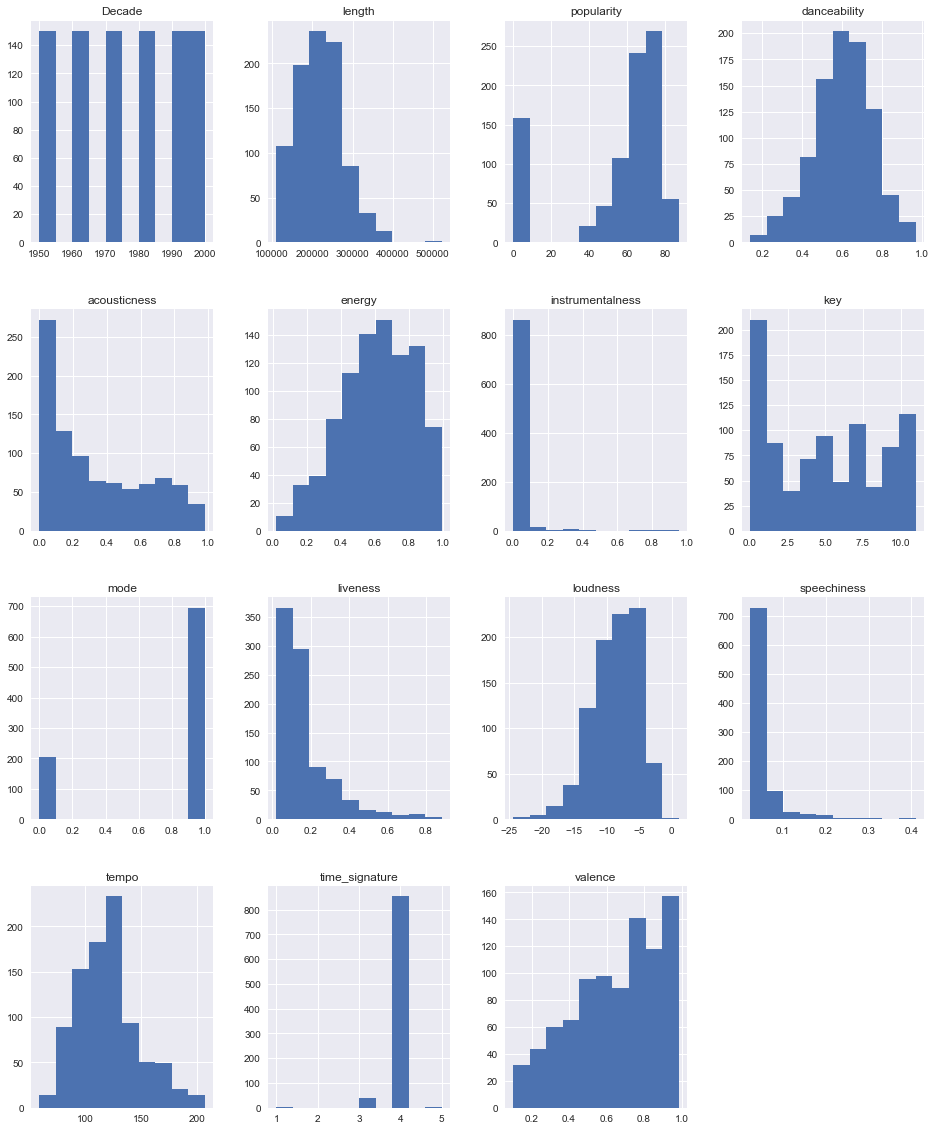

In [22]:
# pandas histogram
data.hist(figsize=(16, 20), bins=10, xlabelsize=10, ylabelsize=10);

<a id="3.2.2"></a>
#### 3.2.2 Feature Correlation

Using the seaborn heatmap, we can see the correlation between various features. Features with the highest positive correlation are energy and mode. Variables with the most negative correlation are energy and acousticness.

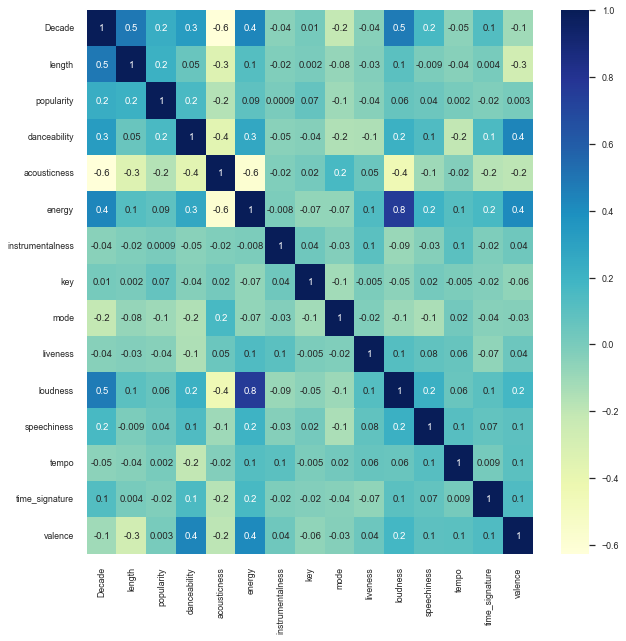

In [23]:
plt.figure(figsize = (10, 10))
sns.set(font_scale=0.8)
sns.heatmap(data.corr(),annot=True,fmt='.1g',cmap="YlGnBu")
plt.show()

<a id="3.2.3"></a>
#### 3.2.3 Top 5 Genre Distribution Through the Decades

We can see genre distribution through the decades. As we can see genres like rock and roll, which dominated the 50s, drastically fell in the 60s and lost their importance starting from the 70s. Rock was the mainstream genre for nearly 3 decades. Pop has been around since the 50s but became the top genre in the 80s, maintaining such a position for the upcoming decades. As for rnb, after a pause for 3 decades it became one of the most influential genres of the 90s and 2000s. Soul for the first half was one of the most important genres reaching its peak in the 60s. However, it started losing its importance from the 70s.

In [24]:
data_top_genres=data[(data["Genre"].isin(("pop","rock","rock and roll","soul","rnb")))]
data_top_genres.groupby(['Decade','Genre']).size()

Decade  Genre        
1950    pop               9
        rnb               5
        rock              4
        rock and roll    55
        soul             17
1960    pop              23
        rock             40
        rock and roll     7
        soul             42
1970    pop              29
        rock             72
        rock and roll     1
        soul             17
1980    pop              72
        rock             64
        soul              2
1990    pop              90
        rnb               9
        rock             33
        soul              4
2000    pop              84
        rnb              17
        rock              8
        soul              5
dtype: int64

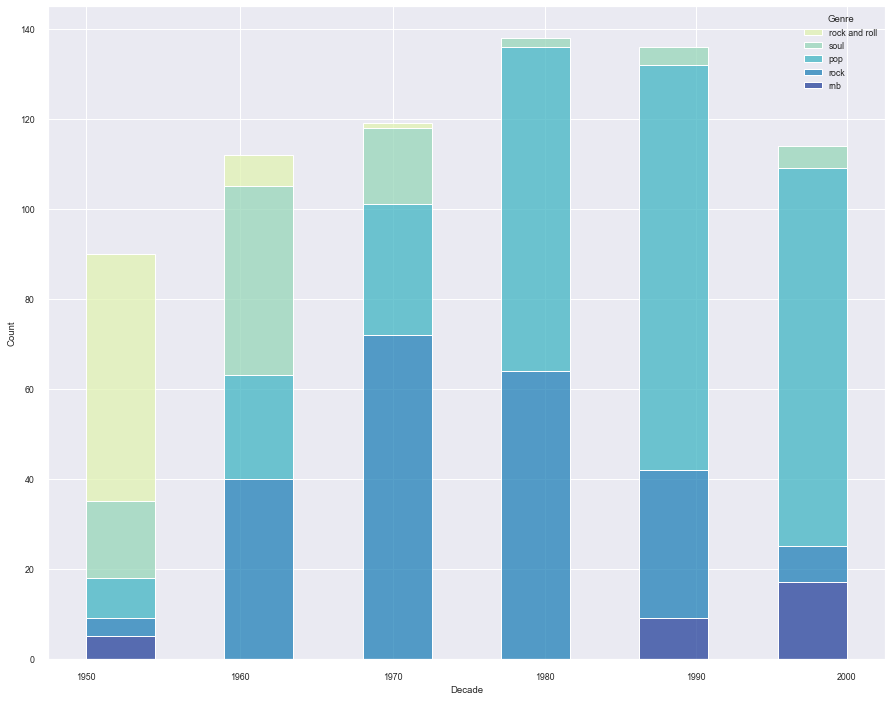

In [25]:
# plot
f, ax = plt.subplots(figsize=(15, 12))
sns.histplot(
    data_top_genres,
    x="Decade", hue="Genre",
    multiple="stack",
    palette="YlGnBu",
    log_scale=True,
)
ax.xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xticks([1950, 1960, 1970, 1980, 1990,2000]);

<a id="3.2.4"></a>
#### 3.2.4 Audio Features Trend

Using a line plot we can show the trend of the features. Features like length, artist popularitydanceability, energy, loudness, speechiness and time signature have experienced a positive trend. On the other hand variables like instrumentalness,  acousticness, liveness, loudness, tempo, mode, key and valence followed a negative trend.

In [26]:
data.groupby(['Decade']).mean()

,length,popularity,danceability,acousticness,energy,instrumentalness,key,mode,liveness,loudness,speechiness,tempo,time_signature,valence
Decade,,,,,,,,,,,,,,
1950,162103.326667,40.200000,0.545173,0.684219,0.477911,0.025988,5.173333,0.846667,0.198898,-10.530093,0.060001,121.429753,3.906667,0.677313
1960,181341.953333,48.220000,0.538907,0.462318,0.533023,0.014831,5.000000,0.880000,0.178496,-9.893987,0.041972,124.262940,3.906667,0.672253
1970,236675.666667,62.326667,0.580273,0.345744,0.561500,0.026558,4.726667,0.786667,0.141307,-10.180867,0.042816,119.465740,3.940000,0.651287
1980,254394.240000,60.400000,0.648713,0.175997,0.681147,0.015410,4.606667,0.780000,0.162661,-8.728340,0.041738,119.785900,3.980000,0.684427
1990,251671.680000,58.500000,0.603447,0.225629,0.677713,0.013117,5.093333,0.786667,0.177789,-7.662453,0.046615,117.876760,3.980000,0.575133
2000,231805.440000,59.760000,0.692500,0.106578,0.739093,0.012301,5.286667,0.546667,0.173366,-5.170013,0.090611,118.999367,4.000000,0.622853


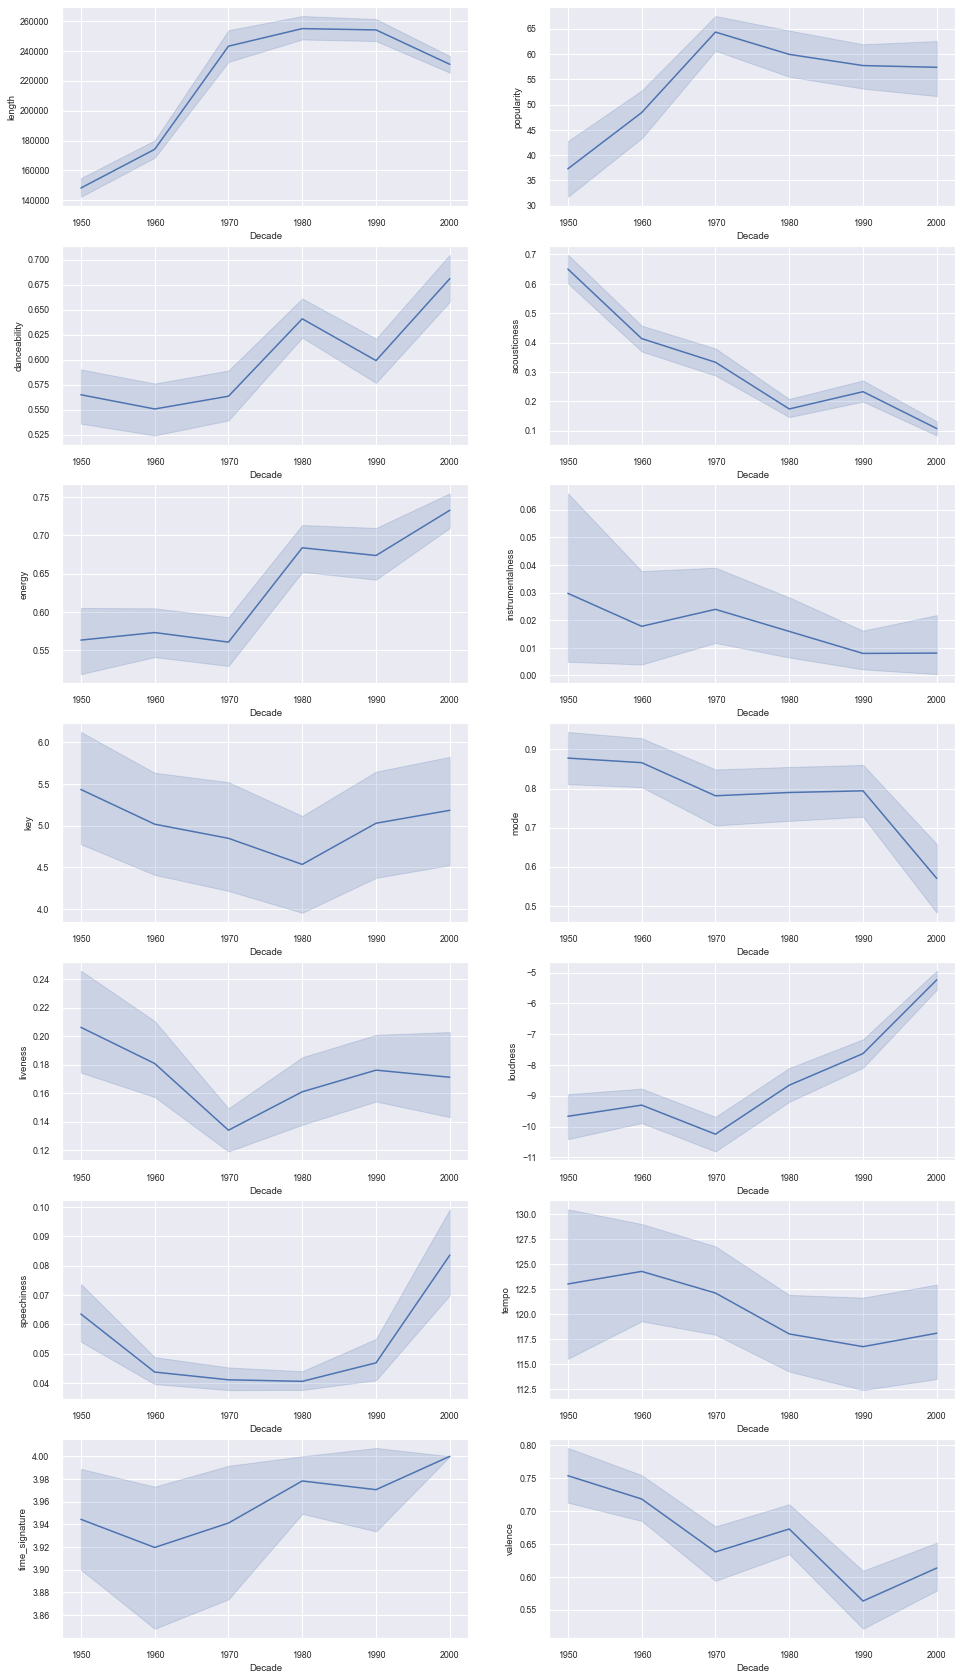

In [27]:
# create numerical variables dataframe
data_num = data_top_genres.select_dtypes(include = ['float64', 'int64'])
#exclude decade column for a better visualization
feat = data_num.columns[1:]
# plot
fig = plt.subplots(figsize=(16,30))
for x,i in zip(feat,range(1, 15)):
    plt.subplot(7, 2, i)
    sns.lineplot(x='Decade', y=x, data=data_num)

Seaborn catplot gives a more detailed view of how each variable develops over time for each genre. Looks like each audio feature follows the same trend independently of the genre.

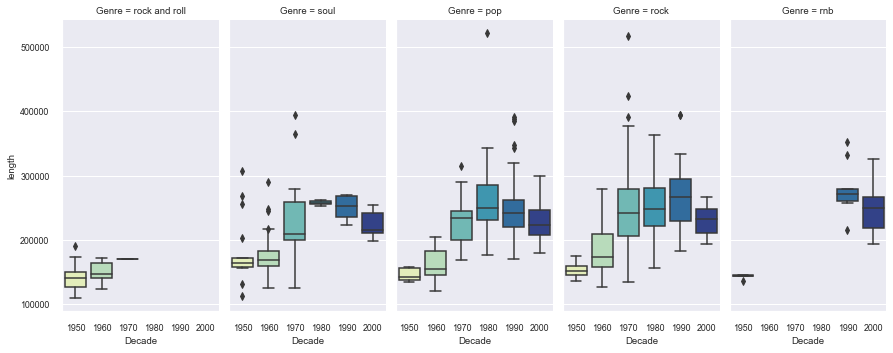

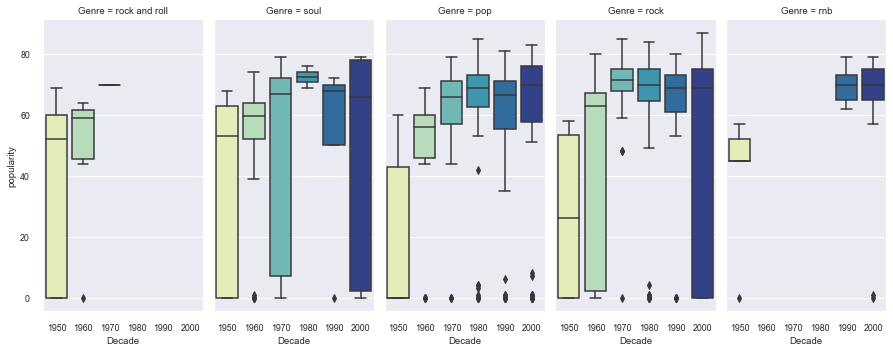

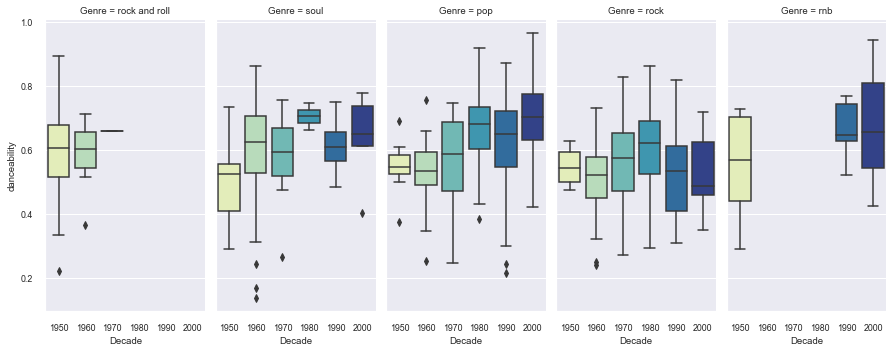

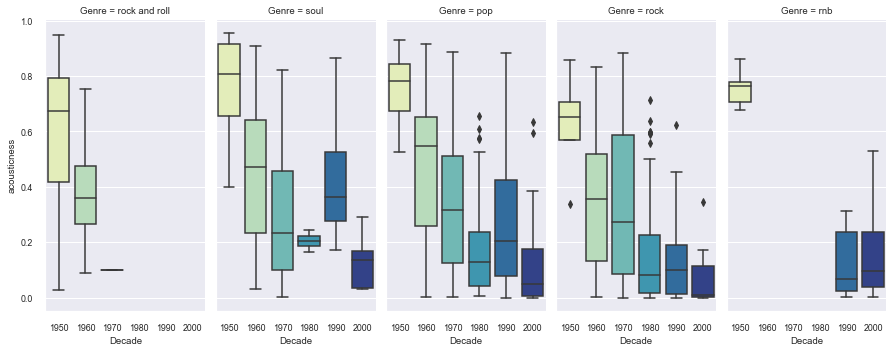

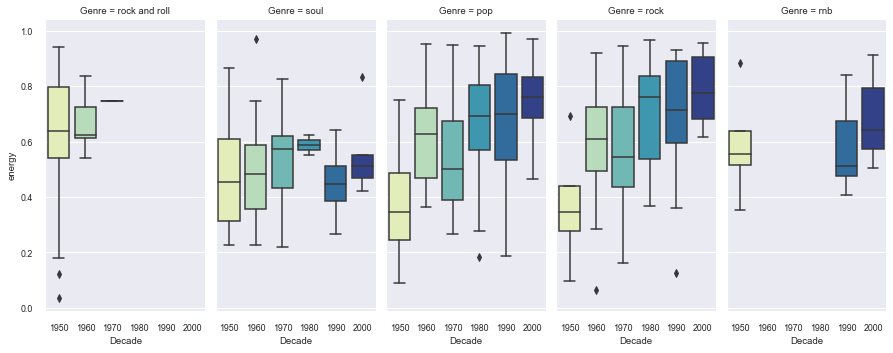

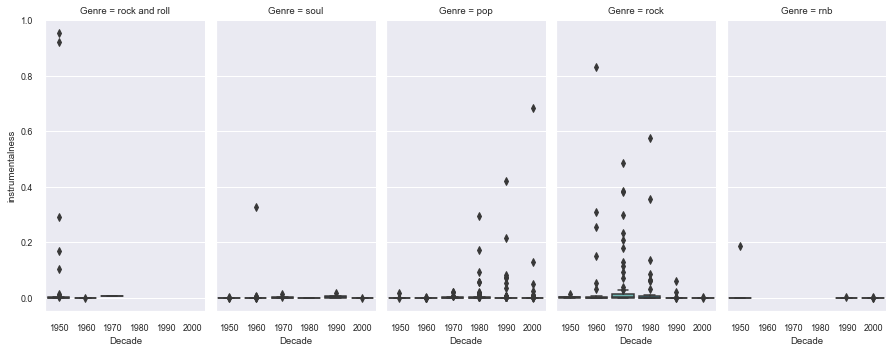

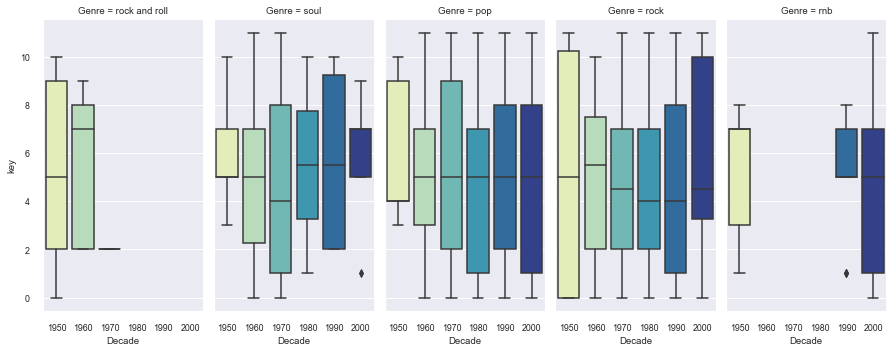

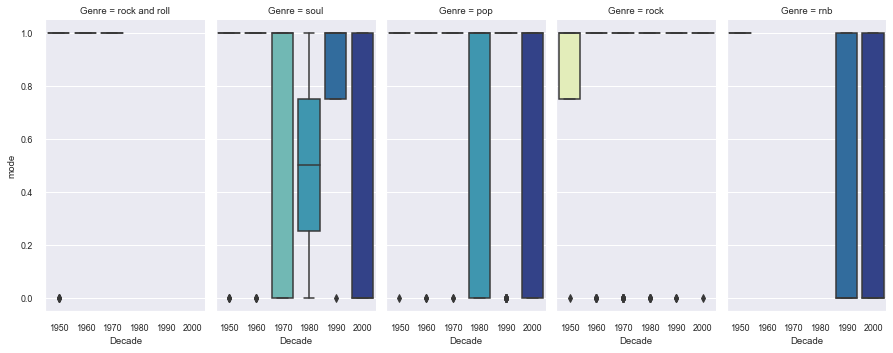

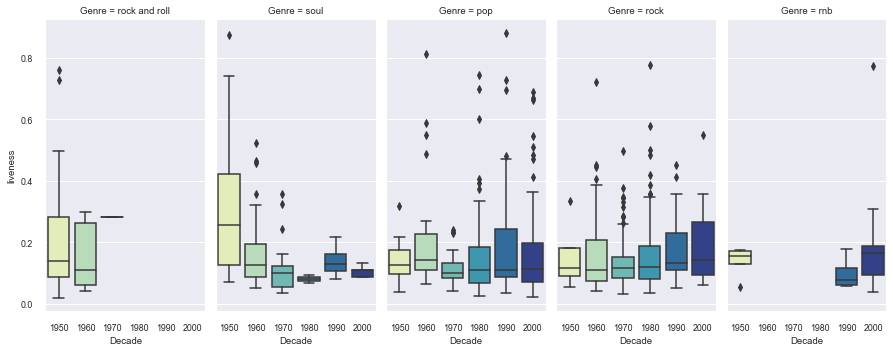

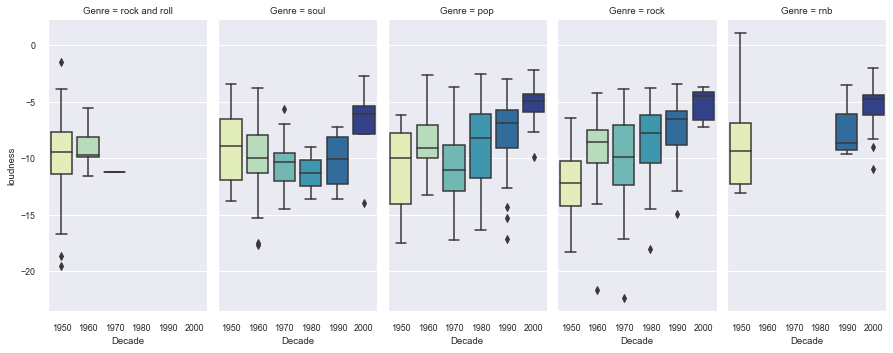

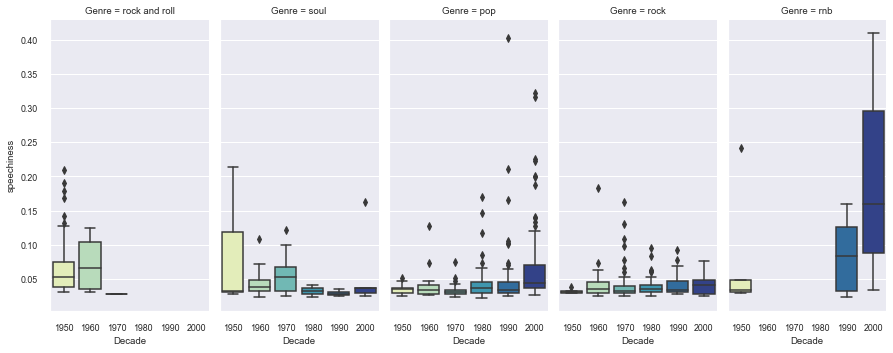

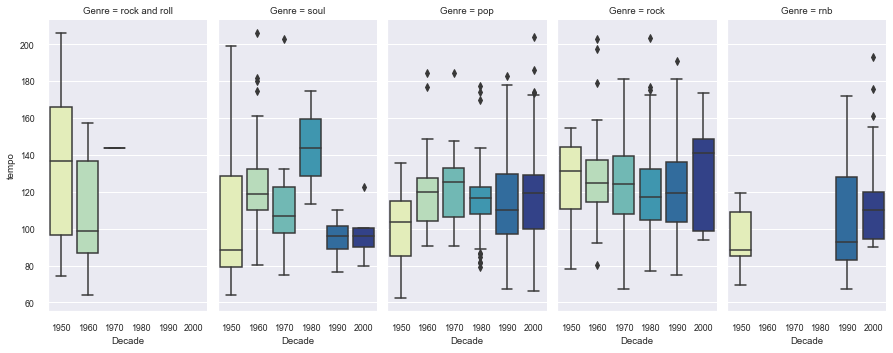

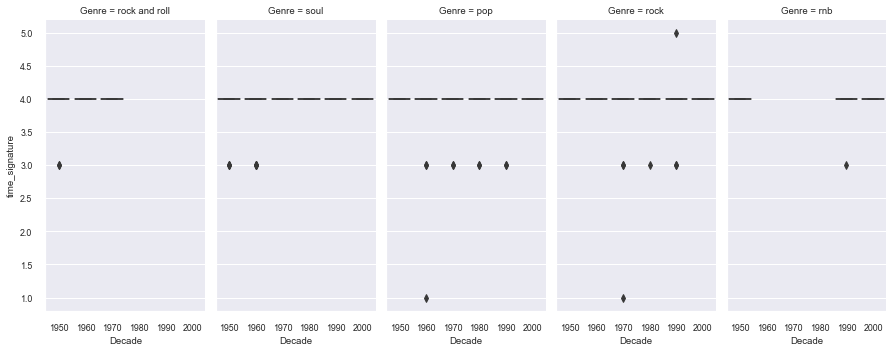

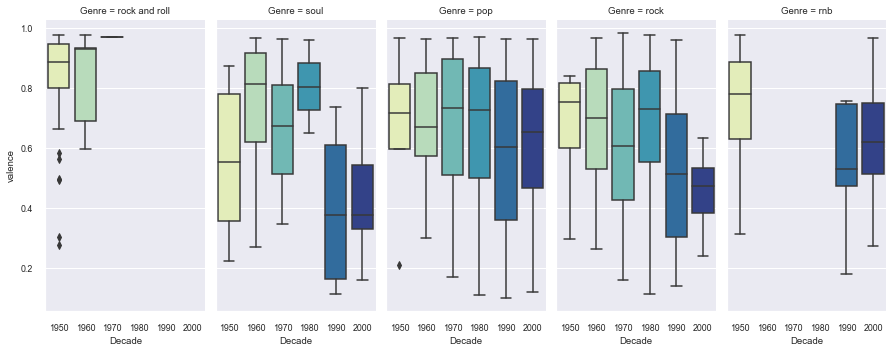

In [28]:
for i in feat:
    g=sns.catplot(x="Decade", y=i,
    col="Genre",palette='YlGnBu',#"light:m_r",
    data=data_top_genres, kind="box",ci=None,color=".3",aspect=.5)

    plt.show()

<a id="3.3"></a>
### 3.3 Natural Language Processing

<a id="3.3.1"></a>
####  3.3.1 Title Statistics

The following functions count the number of words for each title. In this case I am going to use the original name, not the filtered ones.

In [29]:
# append unique lower cased words to an empty list
def u_words(title):
    unique = []
    for i in title:
        if i not in unique:
            unique.append(i.lower())
    return unique

words=[]
for word in data['name'].tolist():
    words.append(u_words((word).split()))
data['original_words'] = words

numbers=[]
for x in range(0,900):
    num = len(data['original_words'][x])
    numbers.append(num)

data['Num']=numbers

Sum of words for each decade. The number reaches its peak in the 70s, then falls by a quarter, reaching its minimum in the 2000s decade.

In [30]:
w_sum = data.groupby('Decade')['Num'].sum().round(2)
w_sum

Decade
1950    448
1960    492
1970    506
1980    499
1990    459
2000    382
Name: Num, dtype: int64

Mean of words for each decade. As stated above, the decade with the least words is the 2000s decade, while 70s songs have longer titles.

In [31]:
w_mean = data.groupby('Decade')['Num'].mean().round(2)
w_mean

Decade
1950    2.99
1960    3.28
1970    3.37
1980    3.33
1990    3.06
2000    2.55
Name: Num, dtype: float64

This function allows you to count unique words for each decade. In this case the results are slightly different from above. Still, the first half of the dataset has a higher number of unique words.

In [32]:
# unique words
def w_unique(df):
    words= df.groupby('Decade')['original_words'].sum()
    words = words.apply(Counter).apply(len)
    return words
w_unique(data)

Decade
1950    288
1960    299
1970    286
1980    275
1990    247
2000    273
Name: original_words, dtype: int64

<a id="3.3.2"></a>
#### 3.3.2  Most Common Words 

First, I am going to define a function to remove stop words and lemmatize them.

In [33]:
# function to remove stopwords
def remove_stopwords(word):
    stop_words = set(stopwords.words('english'))
    wordnet_lemmatizer = WordNetLemmatizer()
    remove_stopwords = " ".join([i for i in word.lower().split() if i not in stop_words])
    lemmatized = (wordnet_lemmatizer.lemmatize(word) for word in remove_stopwords.split())
    return ' '.join(lemmatized)
#no_stopword_text = [w for w in text.split() if not w in stop_words]
data['normalized'] = data['name'].apply(lambda x: remove_stopwords(x))


We can see that the most used words are love, little, woman, want, baby. In the following section we have a more clear view of word distribution by decade.

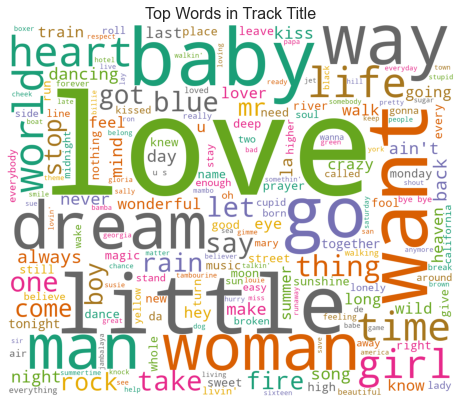

In [34]:
# plot wordcloud
plt.figure(figsize=(8,8))
text = ' '.join(data['normalized'].fillna('').values)
worldcloud = WordCloud(background_color = 'white',width = 1200, height = 1000,colormap="Dark2").generate(text)
plt.imshow(worldcloud)
plt.title('Top Words in Track Title',fontsize=16)
plt.axis('off')
plt.show()

<a id="3.3.3"></a>
#### 3.3.3 Most Common Words By Decade

Now let's visualize the distribution of words for each decade. The first word that catches the attention is the word Love, which independently from the decade remains the most used word in a song title. Words like little or dream have a high concentration in a couple of decades. It is interesting to see how in the 2000s decade the words man and woman get substituted by the words boy and girl.

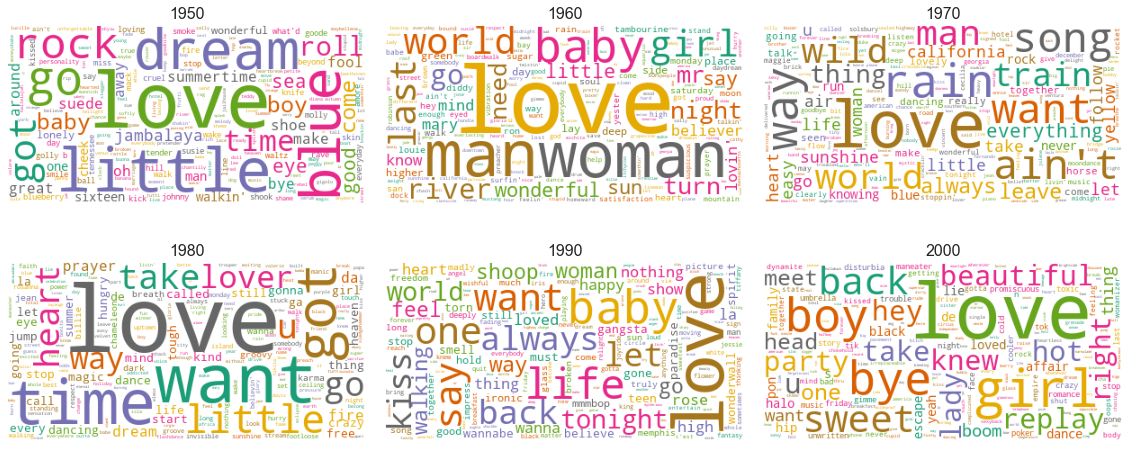

In [35]:
def decade_word(df,row,col):
    dec=[1950,1960,1970,1980,1990,2000]
    plt.figure(figsize=(20,8))
    for index,x in enumerate(dec):
        mask = data[(data["Decade"] == x)]
        text = ' '.join(mask['normalized'].fillna('').values)
        worldcloud = WordCloud(background_color = 'white',colormap="Dark2").generate(text)
        plt.subplot(row, col, index+1)
        plt.imshow(worldcloud)
        plt.axis('off')
        plt.title(f"{x}",fontsize=16)
    plt.subplots_adjust(wspace=0.05)
    plt.show()
decade_word(data,2,3)

<a id="3.3.4"></a>
#### 3.3.4 Track Title Sentiment Analysis

Now we are going to analyze title sentiment by looking at it from two different points of view. In this case we are going to use original titles because using normalized words could remove words that might change the sentiment compound result. First by decade then by genre.

In [36]:
analyzer = SentimentIntensityAnalyzer()
results=[]
for i in data['name']:
    score=analyzer.polarity_scores(i)
    score['song_title']=i
    results.append(score)
sent_score=pd.DataFrame(results).reset_index()
sent_score=sent_score.set_index(data.index)
data['Sentiment']=sent_score['compound']

In [37]:
#Simple function that allows to use the panda plot to show sentiment distribution by a categorical feature
def sentiment_by(feature,plot_kind):
    sentiment=data.groupby(feature)['Sentiment'].mean().round(2)
    sentiment.plot(kind= plot_kind,
                   ylabel='Sentiment',
                   figsize=(10,10),
                   fontsize=12,
                   title=f'Sentiment by {feature}');

The sentiment indicator seems to have reached its peak in the 90s decade. Still, the values are low, so titles in general are neutral.

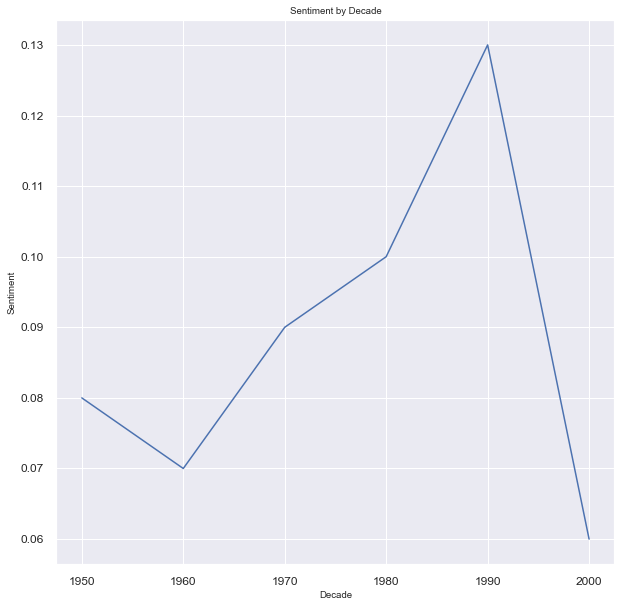

In [38]:
sentiment_by('Decade','line')

Some genres like grunge and house have very high sentiment values. However, there is only one song per genre, so we cannot state that these genres in general have more positive titles.

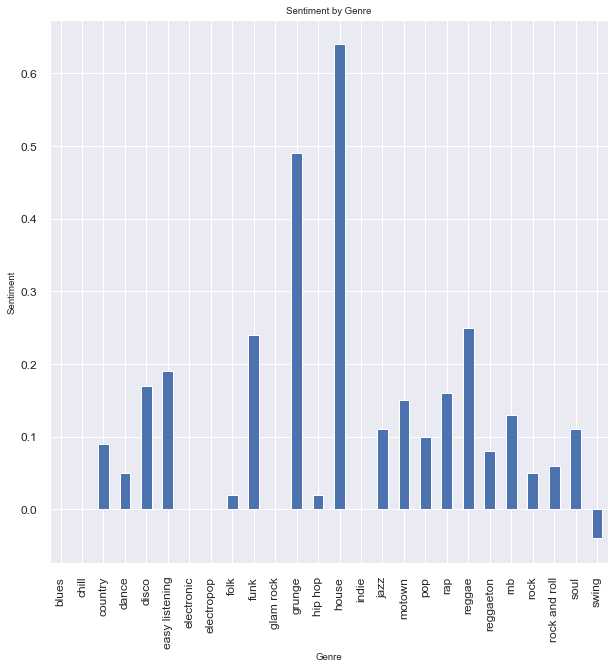

In [39]:
sentiment_by('Genre','bar')

<a id="4"></a>
## 4. Summary and Conclusions 

<a id="4.1"></a>
### 4.1 Conclusions

Through this analysis we have been able to see which genre has dominated each decade and how audio features have changed over the period taken into consideration. To answer the main question of this project, "How modern music has changed over the decades", we can provide various answers. If we analyze the structure, songs became longer, with a higher number of spoken words, a bigger presence of minor modality, and less acoustic. Meanwhile, if we analyze the mood, songs became more danceable and energetic. However, tracks' valence followed a negative trend meaning that at the end of the period songs sounded more negative (e.g. sad, depressed, angry) than at the beginning. Regarding  sentiment analysis, the results did not provide enough evidence for making assumptions.

<a id="4.2"></a>
### 4.2 Future Considerations

Since the sentiment analysis carried out on song titles did not provide any results, it would be interesting to analyze song lyrics and see how they change over time. A further extension to this analysis would be to gather data about song stream/plays or the popularity of the song at the times(analyzing its presence in top music charts) and link them to genres or audio features. Moreover, to apply machine learning models would be necessary to collect a larger amount of data (tracks)

<a id="5"></a>
## 5. References and Resources

<a id="5.1"></a>
### 5.1 References

[1] d'Errico, Francesco, Christopher Henshilwood, Graeme Lawson, et al. 'Archaeological Evidence for the Emergence of Language, Symbolism, and Music—An Alternative Multidisciplinary Perspective', Journal of World Prehistory, vol. 17/no. 1, (2003), pp. 1-70.

[2] Smigel, Eric, and Nan L. McDonald. 'Piecing Together the 20th Century: An Interdisciplinary Unit on Principles of Collage in Modern Music, Art, and Poetry (Grades 4-8)', General Music Today, vol. 24/no. 3, (2011), pp. 10-16.

[3] Developer.spotify.com. 2021. Web API Reference | Spotify for Developers. [online] Available at: <https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features> [Accessed 20 December 2021].

[4] Statista. 2021. Music streaming market share | Statista. [online] Available at: <https://www.statista.com/statistics/653926/music-streaming-service-subscriber-share/> [Accessed 20 December 2021].

[5] En.wikipedia.org. 2021. Last.fm - Wikipedia. [online] Available at: <https://en.wikipedia.org/wiki/Last.fm> [Accessed 20 December 2021].

<a id="5.2"></a>
### 5.2 Resources

#### Data Collection

* Developer.spotify.com. 2021. Web API Libraries | Spotify for Developers. [online] Available at: <https://developer.spotify.com/documentation/web-api/libraries/> [Accessed 10 December 2021].

* Spotipy.readthedocs.io. 2021. Welcome to Spotipy! — spotipy 2.0 documentation. [online] Available at: <https://spotipy.readthedocs.io/en/2.19.0/> [Accessed 10 December 2021].

* Dataquest.io. 2021. [online] Available at: <https://www.dataquest.io/blog/last-fm-api-python/> [Accessed 15 December 2021].

* Last.fm. 2021. API Docs | Last.fm. [online] Available at: <https://www.last.fm/api/show/track.getTopTags> [Accessed 20 December 2021].

* En.wikipedia.org. 2021. Last.fm - Wikipedia. [online] Available at: <https://en.wikipedia.org/wiki/Last.fm> [Accessed 23 December 2021].

* Pandas.pydata.org. 2021. pandas.DataFrame.plot — pandas 1.3.5 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html [Accessed 12 December 2021].

* Retrieving data from the web, Data programming in Python Sean McGrath
* Cleaning and restructuring data. Part 1, Data programming in Python Sean McGrath

#### Exploratory Data Analysis

*  Seaborn.pydata.org. 2021. Stacked histogram on a log scale — seaborn 0.11.2 documentation. [online] Available at: <https://seaborn.pydata.org/examples/histogram_stacked.html> [Accessed 31 December 2021].

* plot, H., Schaaf, H., Schaaf, H. and Duarte, P., 2021. How to change the font size on a matplotlib plot. [online] Stack Overflow. Available at: <https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot> [Accessed 31 December 2021].

* Pandas.pydata.org. 2021. pandas.DataFrame.plot — pandas 1.3.5 documentation. [online] Available at: <https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html> [Accessed 26 December 2021].

* Nltk.org. 2021. NLTK :: nltk.sentiment.vader. [online] Available at: <https://www.nltk.org/_modules/nltk/sentiment/vader.html> [Accessed 28 December 2021].
* Seaborn.pydata.org. 2021. Plotting with categorical data — seaborn 0.11.2 documentation. [online] Available at: <https://seaborn.pydata.org/tutorial/categorical.html> [Accessed 27 December 2021].

[Return to First Page](#0)